<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p8_california_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task is to predict mean house values in Californian districts, given a number of features from these districts.

In [ ]:
from __future__ import print_function

import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(21)

**1. Looking at Data and visualizing it**

---



---



In [ ]:
housing=pd.read_csv('housing.csv')
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


Now, let's see the map of california:

housing prices are related closely to location & population density.

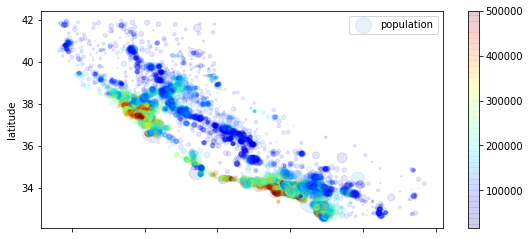

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude',
             alpha=0.1,s=housing['population']/70,label='population',
             c=housing['median_house_value'],cmap='jet',colorbar=True, figsize=(9,4));

In [ ]:
housing.describe().round(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-119.6,35.6,28.6,2635.8,537.9,1425.5,499.5,3.9,206855.8
std,2.0,2.1,12.6,2181.6,421.4,1132.5,382.3,1.9,115395.6
min,-124.4,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1447.8,296.0,787.0,280.0,2.6,119600.0
50%,-118.5,34.3,29.0,2127.0,435.0,1166.0,409.0,3.5,179700.0
75%,-118.0,37.7,37.0,3148.0,647.0,1725.0,605.0,4.7,264725.0
max,-114.3,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


 4 :  **total_bedrooms**    ,  **20433** ,non-null,  float64

 9 :  **ocean_proximity**,     20640 ,non-null,  **object** 


In [ ]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['population_per_households']=housing['population']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']

In [ ]:
housing.drop(['total_rooms','population','total_bedrooms'], axis=1, inplace=True)

In [ ]:
columns=['median_house_value','median_income','rooms_per_household', #reordering columns based on correlation
        'housing_median_age','households','population_per_households',
        'longitude','latitude','bedrooms_per_room','ocean_proximity'
        ]

housing=housing[columns]
housing.head(1)

,median_house_value,median_income,rooms_per_household,housing_median_age,households,population_per_households,longitude,latitude,bedrooms_per_room,ocean_proximity
0,452600.0,8.3252,6.984127,41.0,126.0,2.555556,-122.23,37.88,0.146591,NEAR BAY


In [ ]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_household          0.151948
housing_median_age           0.105623
households                   0.065843
population_per_households   -0.023737
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_room           -0.255880
Name: median_house_value, dtype: float64

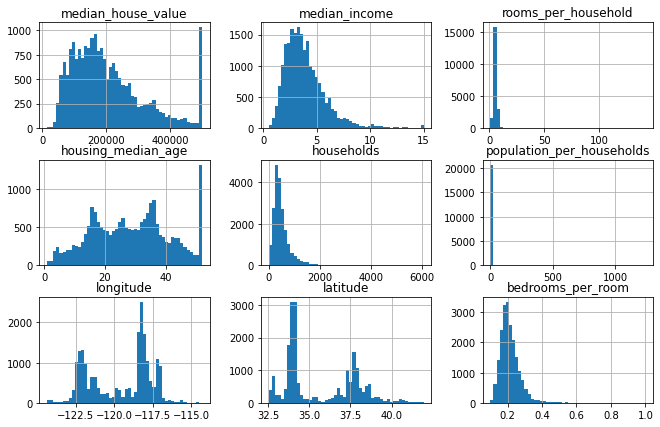

In [ ]:
housing.hist(bins=50,figsize=(11,7));

**Attributes** have different scales.

**some histograms** are tail heavy(skewed), we may need to transform these attributes to get a bell_shaped distributions.

**median_income** is not expressed in US dollar and data has been scaled and capped between 0 and 15.

**median_housing_value** (the target value) has been capped. the possible problem is our ML algoriyhm may learn the prices may never go beyond the limit(solution:1-remove the labels or 2-collect proper labels for the data has been capped.)



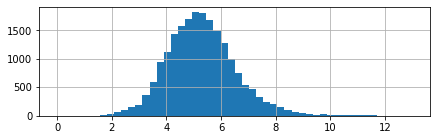

In [ ]:
housing['rooms_per_household'].hist(bins=50,range=(0,13),figsize=(7,2));

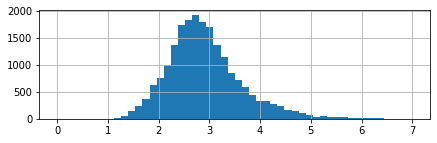

In [ ]:
housing['population_per_households'].hist(bins=50,range=(0,7),figsize=(7,2));

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_household          0.151948
housing_median_age           0.105623
households                   0.065843
population_per_households   -0.023737
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_room           -0.255880
Name: median_house_value, dtype: float64

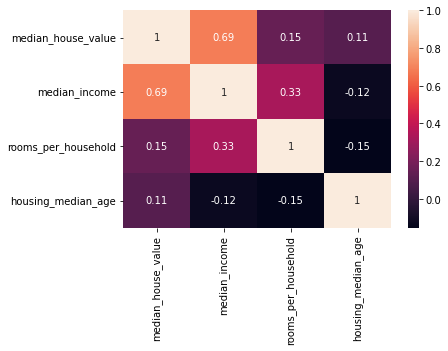

In [ ]:
import seaborn as sns

list=['median_house_value', 'median_income', 'rooms_per_household', 'housing_median_age']
sns.heatmap(housing[list].corr(), annot=True)

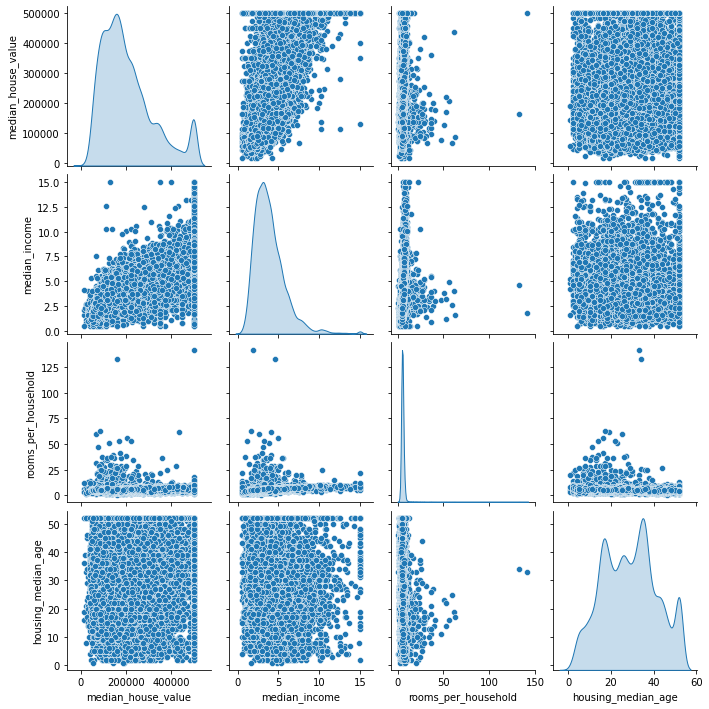

In [ ]:
import seaborn as sns

list=['median_house_value', 'median_income', 'rooms_per_household', 'housing_median_age']
sns.pairplot(housing, vars=list, diag_kind='kde') # extra option: hue=

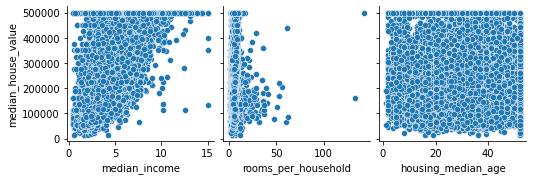

In [ ]:
sns.pairplot(housing, x_vars=[ 'median_income', 'rooms_per_household', 'housing_median_age'], y_vars='median_house_value')

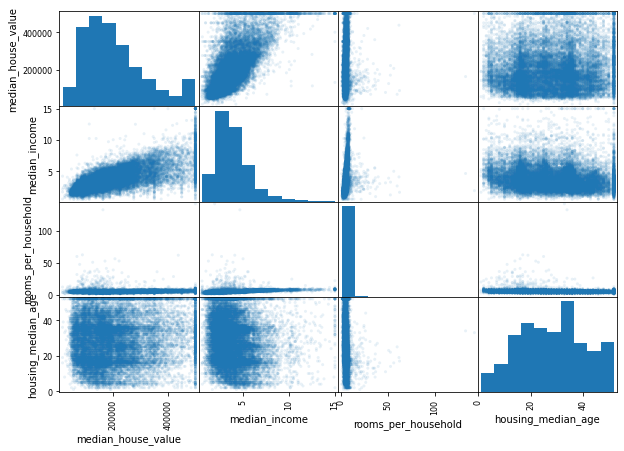

In [ ]:
from pandas.plotting import scatter_matrix

list=['median_house_value', 'median_income', 'rooms_per_household', 'housing_median_age']
scatter_matrix(housing[list], alpha=0.1,figsize=(10,7));

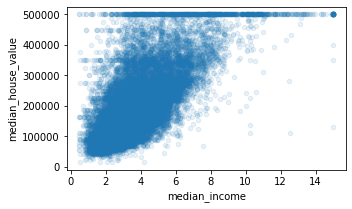

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1,figsize=(5,3));

**median_income** is a continuous attribute that is highly correlated to median_house_value.(correlation coefficient is beween -1 and 1)

First, we need to create income category.

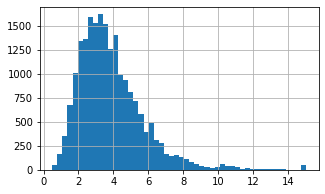

In [ ]:
housing['median_income'].hist(bins=50,figsize=(5,3));

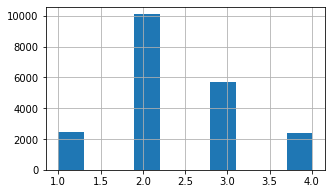

In [ ]:
housing['income']=pd.cut(housing['median_income'], bins=[0,2,4,6,np.inf], labels=[1,2,3,4])
housing['income'].hist(figsize=(5,3));

**2. Splitting the Data for Training and Testing**

**pd.cut(x, bins)**

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, cut could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat=StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=21)

**StratifiedShuffleSplit**

Provides train/test indices to split data in train/test sets. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Methods: **split(X, y[, groups])**

Generate indices to split data into training and test set.

In [ ]:
for train_index, test_index in strat.split(housing, housing['income']):
  train_set=housing.loc[train_index]
  test_set=housing.loc[test_index]

In [ ]:
train_set.head(1)

,median_house_value,median_income,rooms_per_household,housing_median_age,households,population_per_households,longitude,latitude,bedrooms_per_room,ocean_proximity,income
15410,151400.0,2.1293,4.735238,9.0,525.0,3.691429,-117.24,33.21,0.25181,<1H OCEAN,2


In [ ]:
for set in (train_set, test_set):
  set.drop('income', axis=1, inplace=True)

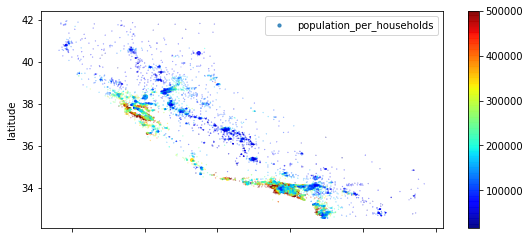

In [ ]:
train_set.plot(kind='scatter', x='longitude', y='latitude',
             alpha=0.8,s=train_set['population_per_households']/60,label='population_per_households',
             c=train_set['median_house_value'],cmap='jet',colorbar=True, figsize=(9,4));

**3. Preparing Data and Cleaning it**

---



---



In [ ]:
data=train_set.drop('median_house_value', axis=1)
target=train_set['median_house_value'].copy()

x_test=test_set.drop('median_house_value', axis=1)
y_test=test_set['median_house_value'].copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15410 to 15708
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   median_income              16512 non-null  float64
 1   rooms_per_household        16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   households                 16512 non-null  float64
 4   population_per_households  16512 non-null  float64
 5   longitude                  16512 non-null  float64
 6   latitude                   16512 non-null  float64
 7   bedrooms_per_room          16340 non-null  float64
 8   ocean_proximity            16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


There are missing values for **bedrooms_per_room** feature.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline=Pipeline([
                       ('imputer', SimpleImputer(strategy='mean')),
                       ('scaler', StandardScaler())
])

num_attribs=['median_income', 'rooms_per_household','housing_median_age',
             'households','population_per_households','longitude','latitude','bedrooms_per_room']
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
                                 ('num',num_pipeline,num_attribs),
                                 ('cat',OneHotEncoder(),cat_attribs)
])

data_tr=full_pipeline.fit_transform(data)
data_tr

array([[-0.92165319, -0.29450913, -1.5686908 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.67821965, -0.82785068,  1.85690738, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.05234529, -0.16547399, -1.2500305 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.7677165 , -0.42398925,  1.13992171, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10413584, -0.10708087,  0.42293605, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23010106, -0.64179122,  1.85690738, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
x_test_tr=full_pipeline.transform(x_test)

**3. Training the Data & Model Evaluation & Fine-Tune Model**

**LinearRegression**

In [ ]:
train_set['median_house_value'].min(), train_set['median_house_value'].max()

(14999.0, 500001.0)

**score**(X, y, sample_weight=None)

Return the coefficient of determination  of the prediction.

The coefficient R^2 is defined as (1-u/v): 
 
where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

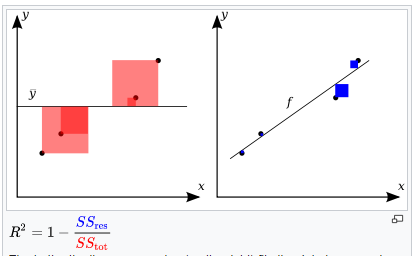

**SGD** stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, LassoCV, Ridge, SGDRegressor

def f(reg):
  scores=cross_val_score(reg, data_tr, target, scoring='neg_mean_squared_error', cv=5)
  rmse=np.sqrt(-scores)
  return (rmse.mean().round(1), rmse.std().round(1))


In [ ]:
lin_reg=LinearRegression()
elastic_net=ElasticNet()
ridge=Ridge()
sgd_reg=SGDRegressor()

print('LinearRegression:',f(lin_reg));
print('ElasticNet:',f(elastic_net));
print('Ridge:',f(ridge));
print('sgd_reg:',f(sgd_reg));

LinearRegression: (70837.5, 1975.4)
ElasticNet: (79473.3, 2103.7)
Ridge: (70831.2, 1977.1)
sgd_reg: (29459743.4, 58755765.7)


In [ ]:
from sklearn.metrics import mean_absolute_error
lasso=LassoCV(cv=5)
lasso.fit(data_tr, target)

y_pred_lasso=lasso.predict(data_tr)
mae_lasso=mean_absolute_error(y_pred_lasso, target)

r_2_lasso=lasso.score(data_tr, target)
print(mae_lasso.round(1))
print(r_2_lasso.round(1))

51450.9
0.6


Final Model

In [ ]:
x_test=test_set.drop('median_house_value', axis=1)
y_test=test_set['median_house_value'].copy()

x_test_tr=full_pipeline.transform(x_test)

lasso_pred=lasso.predict(x_test_tr)
np.sqrt(mean_squared_error(y_test,lasso_pred)).round(1)

69506.0

The model is overfitting!

**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd_forest=RandomForestRegressor()
forest_scores=cross_val_score(rnd_forest, data_tr, target, scoring='neg_mean_squared_error', cv=5)
rmse_forest=np.sqrt(-forest_scores)

rmse_forest.mean().round(1), rmse_forest.std().round(1)

(50183.2, 1292.8)

RandomizedSearchCV

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

#RandomForestRegressor(n_estimators=100,criterion='mse', max_depth=None, max_features='auto', bootstrap=True)

#param_distributions={'n_estimators':[50,100, 150],'max_features':[4,5,6], 'bootstrap':[False, True]}
            

#rnd_search= RandomizedSearchCV(rnd_forest, param_distributions, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
#rnd_search.fit(data_tr, target)

#rnd_search.best_params_, rnd_search.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV

#RandomForestRegressor(n_estimators=100,criterion='mse', max_depth=None, max_features='auto', bootstrap=True)

param_grid={'n_estimators':[10,20],'max_depth':[1,2,3]}
            

grid_search= GridSearchCV(rnd_forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_tr, target)

grid_search.best_params_, grid_search.best_estimator_

({'max_depth': 3, 'n_estimators': 10},
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

In [ ]:
forest_model=grid_search.best_estimator_
np.sqrt(mean_squared_error(target, forest_model.predict(data_tr))).round(1)

73884.7

In [ ]:
forest_model.score(data_tr,target).round(2)

0.59

Final Model

In [ ]:
x_test=test_set.drop('median_house_value', axis=1)
y_test=test_set['median_house_value'].copy()

x_test_tr=full_pipeline.transform(x_test)

forest_pred=forest_model.predict(x_test_tr)
np.sqrt(mean_squared_error(y_test,forest_pred))

74492.07150101618

The model is slightly overfitting!

**Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn_scores=cross_val_score(knn, data_tr, target, scoring='neg_mean_squared_error' , cv=5)
rmse_knn=np.sqrt(-knn_scores)
rmse_knn.mean().round(1), rmse_knn.std().round(1)

(64585.7, 1721.7)

In [ ]:
from sklearn.model_selection import GridSearchCV

#KNeighborsRegressor(n_neighbors=5, p=2)

param_grid={'n_neighbors':[5, 15, 20]}
            

grid_search= GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_tr, target)

grid_search.best_params_, grid_search.best_estimator_

({'n_neighbors': 15},
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform'))

In [ ]:
knn_model=grid_search.best_estimator_
np.sqrt(mean_squared_error(target, knn_model.predict(data_tr)))

58853.94167843923

In [ ]:
knn_model.score(data_tr,target)

0.7403682125158004

Final Model

In [ ]:
x_test=test_set.drop('median_house_value', axis=1)
y_test=test_set['median_house_value'].copy()

x_test_tr=full_pipeline.transform(x_test)

knn_pred=knn_model.predict(x_test_tr)
np.sqrt(mean_squared_error(y_test,knn_pred))

61585.4413235297

The model is overfitting!

**LinearSVR**

In [ ]:
from sklearn.svm import LinearSVR

lin_svr=LinearSVR()
lin_svr_scores=cross_val_score(lin_svr, data_tr, target, scoring='neg_mean_squared_error', cv=5)
rmse_lin_svr=np.sqrt(-lin_svr_scores)
rmse_lin_svr.mean().round(1), rmse_lin_svr.std().round(1)

(222147.0, 2310.3)

In [ ]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr_scores=cross_val_score(svr, data_tr, target, scoring='neg_mean_squared_error', cv=5)
rmse_svr=np.sqrt(-svr_scores)
rmse_svr.mean().round(1), rmse_svr.std().round(1)

(118302.1, 1859.0)

**Confidence Interval**

scipy.stats.sem

scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')

Calculate the standard error of the mean of the values in the input array.

In [ ]:
from scipy import stats

confidence=0.95
sq_err=(y_test-forest_pred)**2

conf= stats.t.interval(confidence, len(sq_err)-1,
                 loc= sq_err.mean(),
                 scale=stats.sem(sq_err))

np.sqrt(conf).round(1)


array([72133.5, 76778.2])